In [1]:
import gensim
import gensim
import pandas as pd
import numpy as np
import gzip
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Question 2

In [81]:
#read in dataset
imdb=pd.read_csv('IMDB Dataset.csv')
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [82]:
target_vals=imdb['sentiment'].value_counts().reset_index()

<AxesSubplot:xlabel='index', ylabel='sentiment'>

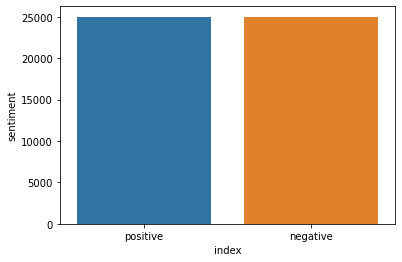

In [83]:
sns.barplot(x='index',y='sentiment',data=target_vals)

In [4]:
#import simple preprocess module from gensim
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
imdb['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in imdb['review']]
#print first 10 tokenized reviews
print(imdb['tokenized_text'].head(10))

0    [one, of, the, other, reviewers, has, mentione...
1    [wonderful, little, production, br, br, the, f...
2    [thought, this, was, wonderful, way, to, spend...
3    [basically, there, family, where, little, boy,...
4    [petter, mattei, love, in, the, time, of, mone...
5    [probably, my, all, time, favorite, movie, sto...
6    [sure, would, like, to, see, resurrection, of,...
7    [this, show, was, an, amazing, fresh, innovati...
8    [encouraged, by, the, positive, comments, abou...
9    [if, you, like, original, gut, wrenching, laug...
Name: tokenized_text, dtype: object


In [5]:
#import porterstemmer
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
imdb['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in imdb['tokenized_text'] ]
imdb['stemmed_tokens'].head(10)

0    [on, of, the, other, review, ha, mention, that...
1    [wonder, littl, product, br, br, the, film, te...
2    [thought, thi, wa, wonder, wai, to, spend, tim...
3    [basic, there, famili, where, littl, boi, jake...
4    [petter, mattei, love, in, the, time, of, mone...
5    [probabl, my, all, time, favorit, movi, stori,...
6    [sure, would, like, to, see, resurrect, of, up...
7    [thi, show, wa, an, amaz, fresh, innov, idea, ...
8    [encourag, by, the, posit, comment, about, thi...
9    [if, you, like, origin, gut, wrench, laughter,...
Name: stemmed_tokens, dtype: object

In [6]:
#conduct 80/20 train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(imdb['stemmed_tokens'], 
                                                        imdb['sentiment'], 
                                                        shuffle=True,
                                                        test_size=0.2, 
                                                        random_state=15)

## Preprocessing

Basic preprocessing was conducted such as converting all words to lowercase, stemming, and tokenizing all words so that they can be more easily represented as one-hot encoded vectors that can be passed into our word2vec model

# Question 3

## Part 1

In [7]:
#assign stemmed tokens to new variable
stemmed_tokens = pd.Series(imdb['stemmed_tokens']).values

In [8]:
#fit word2vec model on stemmed tokens
w2v_model = gensim.models.Word2Vec (stemmed_tokens, vector_size=100, window=5, min_count=5, sg=1)

2023-03-08 18:50:15,328 : INFO : collecting all words and their counts
2023-03-08 18:50:15,328 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-08 18:50:15,531 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-08 18:50:15,717 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-08 18:50:15,913 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-08 18:50:16,106 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-08 18:50:16,296 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-08 18:50:16,297 : INFO : Creating a fresh vocabulary
2023-03-08 18:50:16,349 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.64% of original 68818, drops 42230)', 'datetime': '2023-03-08T18:50:16.349078', '

2023-03-08 18:51:03,386 : INFO : EPOCH 3 - PROGRESS: at 95.50% examples, 720402 words/s, in_qsize 5, out_qsize 0
2023-03-08 18:51:03,895 : INFO : EPOCH 3: training on 11176467 raw words (8368186 effective words) took 11.6s, 720818 effective words/s
2023-03-08 18:51:04,909 : INFO : EPOCH 4 - PROGRESS: at 8.62% examples, 706758 words/s, in_qsize 5, out_qsize 0
2023-03-08 18:51:05,917 : INFO : EPOCH 4 - PROGRESS: at 17.20% examples, 713872 words/s, in_qsize 5, out_qsize 0
2023-03-08 18:51:06,926 : INFO : EPOCH 4 - PROGRESS: at 25.90% examples, 716360 words/s, in_qsize 5, out_qsize 0
2023-03-08 18:51:07,936 : INFO : EPOCH 4 - PROGRESS: at 34.61% examples, 717638 words/s, in_qsize 5, out_qsize 0
2023-03-08 18:51:08,936 : INFO : EPOCH 4 - PROGRESS: at 43.28% examples, 719463 words/s, in_qsize 5, out_qsize 0
2023-03-08 18:51:09,947 : INFO : EPOCH 4 - PROGRESS: at 51.94% examples, 719658 words/s, in_qsize 5, out_qsize 0
2023-03-08 18:51:10,949 : INFO : EPOCH 4 - PROGRESS: at 60.68% examples, 7

In [88]:
#function to create document vectors by averaging all word vectors
def create_doc_vec(X):  
    #create empty list for vectors
    doc_vec=[]
    #loop through values
    for i in range(0, len(X)):
        #subset to only words that appear in the word2vec corpus
        w2v_words=[word for word in X.iloc[i] if (word in w2v_model.wv.index_to_key)]
        #take the row-wise mean using numpy and append to list
        doc_vec.append((np.mean([w2v_model.wv[token] for token in w2v_words], axis=0)).tolist())
    #convert to pandas df for use in ML tasks
    return pd.DataFrame(doc_vec)

In [89]:
#create training doc embeddings
w2v_embed_df_train=create_doc_vec(X_train)

In [90]:
#import logit
from sklearn.linear_model import LogisticRegression
#fit logit
logreg = LogisticRegression(n_jobs=1)
logreg.fit(w2v_embed_df_train, Y_train)

LogisticRegression(n_jobs=1)

In [92]:
from sklearn.metrics import classification_report

In [93]:
#evaluate performance on test set
doc_vec_test=create_doc_vec(X_test)
test_predictions_word2vec = logreg.predict(doc_vec_test)
print(classification_report(Y_test,test_predictions_word2vec))

              precision    recall  f1-score   support

    negative       0.83      0.83      0.83      4988
    positive       0.83      0.83      0.83      5012

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [101]:
train_predictions_word2vec=logreg.predict(w2v_embed_df_train)
classification_report(Y_train, train_predictions_word2vec, output_dict=True)['accuracy']

0.82585

In [102]:
classification_report(Y_test, test_predictions_word2vec, output_dict=True)['accuracy']

0.8275

## Analysis:

Given that the classes are balanced (roughly 50/50) I would say that the accuracy measure is appropriate, and that our model performed fairly well given that the accuracy was 83% on our test set and 82.5% on the training set. 

## Part 2

In [103]:
#loop through output size
test_acc=[]
train_acc=[]
for i in [25, 50, 100, 150]:
    #fit w2v model
    w2v_model = gensim.models.Word2Vec (stemmed_tokens, vector_size=i, window=5, min_count=5, sg=1)
    #create doc embeddings df
    w2v_embed_df_train=create_doc_vec(X_train)
    #fit logit
    logreg = LogisticRegression(n_jobs=1)
    logreg.fit(w2v_embed_df_train, Y_train)
    #create test doc vectors
    doc_vec_test=create_doc_vec(X_test)
    #evaluate predictions
    test_predictions_word2vec = logreg.predict(doc_vec_test)
    train_predictions_word2vec = logreg.predict(w2v_embed_df_train)
    print('CLASSIFICATION REPORT FOR SIZE=',i)
    print(classification_report(Y_test,test_predictions_word2vec))
    test_acc.append(classification_report(Y_test, test_predictions_word2vec, output_dict=True)['accuracy'])
    train_acc.append(classification_report(Y_train, train_predictions_word2vec, output_dict=True)['accuracy'])

2023-03-12 10:55:04,348 : INFO : collecting all words and their counts
2023-03-12 10:55:04,350 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-12 10:55:04,635 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-12 10:55:04,883 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-12 10:55:05,158 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-12 10:55:05,397 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-12 10:55:05,702 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-12 10:55:05,702 : INFO : Creating a fresh vocabulary
2023-03-12 10:55:05,758 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.64% of original 68818, drops 42230)', 'datetime': '2023-03-12T10:55:05.758768', '

CLASSIFICATION REPORT FOR SIZE= 25
              precision    recall  f1-score   support

    negative       0.83      0.83      0.83      4988
    positive       0.83      0.83      0.83      5012

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



2023-03-12 10:57:40,781 : INFO : collecting all words and their counts
2023-03-12 10:57:40,782 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-12 10:57:40,965 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-12 10:57:41,178 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-12 10:57:41,391 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-12 10:57:41,608 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-12 10:57:41,834 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-12 10:57:41,835 : INFO : Creating a fresh vocabulary
2023-03-12 10:57:41,888 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.64% of original 68818, drops 42230)', 'datetime': '2023-03-12T10:57:41.888001', '

2023-03-12 10:58:27,249 : INFO : Word2Vec lifecycle event {'msg': 'training on 55882335 raw words (41841247 effective words) took 45.2s, 925820 effective words/s', 'datetime': '2023-03-12T10:58:27.249513', 'gensim': '4.2.0', 'python': '3.8.11 (default, Aug 16 2021, 12:04:33) \n[Clang 12.0.0 ]', 'platform': 'macOS-13.2.1-arm64-arm-64bit', 'event': 'train'}
2023-03-12 10:58:27,249 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=26588, vector_size=50, alpha=0.025>', 'datetime': '2023-03-12T10:58:27.249796', 'gensim': '4.2.0', 'python': '3.8.11 (default, Aug 16 2021, 12:04:33) \n[Clang 12.0.0 ]', 'platform': 'macOS-13.2.1-arm64-arm-64bit', 'event': 'created'}


CLASSIFICATION REPORT FOR SIZE= 50
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4988
    positive       0.85      0.85      0.85      5012

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



2023-03-12 11:00:27,246 : INFO : collecting all words and their counts
2023-03-12 11:00:27,246 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-12 11:00:27,443 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-12 11:00:27,652 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-12 11:00:27,866 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-12 11:00:28,092 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-12 11:00:28,308 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-12 11:00:28,309 : INFO : Creating a fresh vocabulary
2023-03-12 11:00:28,363 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.64% of original 68818, drops 42230)', 'datetime': '2023-03-12T11:00:28.362861', '

2023-03-12 11:01:15,522 : INFO : EPOCH 3: training on 11176467 raw words (8370450 effective words) took 11.8s, 712318 effective words/s
2023-03-12 11:01:16,543 : INFO : EPOCH 4 - PROGRESS: at 8.62% examples, 703434 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:01:17,561 : INFO : EPOCH 4 - PROGRESS: at 17.20% examples, 709270 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:01:18,579 : INFO : EPOCH 4 - PROGRESS: at 25.90% examples, 710983 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:01:19,602 : INFO : EPOCH 4 - PROGRESS: at 34.61% examples, 711321 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:01:20,608 : INFO : EPOCH 4 - PROGRESS: at 43.28% examples, 713393 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:01:21,625 : INFO : EPOCH 4 - PROGRESS: at 51.94% examples, 713871 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:01:22,642 : INFO : EPOCH 4 - PROGRESS: at 60.76% examples, 714461 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:01:23,660 : INFO : EPOCH 4 - PROGRESS: at 69.45% examples, 7

CLASSIFICATION REPORT FOR SIZE= 100
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      4988
    positive       0.86      0.86      0.86      5012

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



2023-03-12 11:03:28,758 : INFO : collecting all words and their counts
2023-03-12 11:03:28,759 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-12 11:03:28,941 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-12 11:03:29,138 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-12 11:03:29,337 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-12 11:03:29,544 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-12 11:03:29,746 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-12 11:03:29,747 : INFO : Creating a fresh vocabulary
2023-03-12 11:03:29,798 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.64% of original 68818, drops 42230)', 'datetime': '2023-03-12T11:03:29.798498', '

2023-03-12 11:04:16,874 : INFO : EPOCH 3 - PROGRESS: at 20.40% examples, 563862 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:04:17,877 : INFO : EPOCH 3 - PROGRESS: at 27.27% examples, 567392 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:04:18,877 : INFO : EPOCH 3 - PROGRESS: at 34.26% examples, 570352 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:04:19,887 : INFO : EPOCH 3 - PROGRESS: at 41.08% examples, 569543 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:04:20,891 : INFO : EPOCH 3 - PROGRESS: at 47.92% examples, 569846 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:04:21,911 : INFO : EPOCH 3 - PROGRESS: at 54.93% examples, 569860 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:04:22,914 : INFO : EPOCH 3 - PROGRESS: at 61.80% examples, 570332 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:04:23,915 : INFO : EPOCH 3 - PROGRESS: at 68.71% examples, 570626 words/s, in_qsize 5, out_qsize 0
2023-03-12 11:04:24,916 : INFO : EPOCH 3 - PROGRESS: at 75.49% examples, 570341 words/s, in_qsiz

CLASSIFICATION REPORT FOR SIZE= 150
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      4988
    positive       0.87      0.87      0.87      5012

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## Analysis:

The accuracy increases for every increase in vector size, which makes sense because we are compressing the information into fewer dimensions preserving more of the initial meaning behind each word. The accuracy of a vector size of 25 was 83%, for vector size 50 it was 85%, for vector size 100 it was 86%, and for vector size 150 it was 87

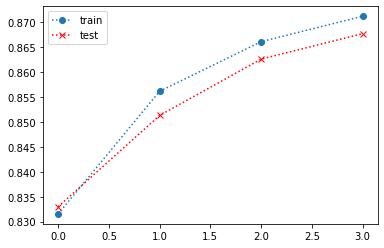

In [114]:
import matplotlib.pyplot as plt
d={"train":train_acc,
  "test":test_acc}
acc_df=pd.DataFrame(d)
acc_df.plot(style=['o','rx'], linestyle = 'dotted')
plt.show()

## Part 3

In [119]:
#Loop through window size
test_acc2=[]
train_acc2=[]
for i in [2, 3, 5, 10]:
    #fit w2v model
    w2v_model = gensim.models.Word2Vec (stemmed_tokens, vector_size=100, window=i, min_count=5, sg=1)
    #create doc embeddings train df
    w2v_embed_df_train=create_doc_vec(X_train)
    #fit logit
    logreg = LogisticRegression(n_jobs=1)
    logreg.fit(w2v_embed_df_train, Y_train)
    #create doc embeddings test df
    doc_vec_test=create_doc_vec(X_test)
    #evaluate performance
    test_predictions_word2vec = logreg.predict(doc_vec_test)
    train_predictions_word2vec = logreg.predict(w2v_embed_df_train)
    print('CLASSIFICATION REPORT FOR WINDOW=',i)
    print(classification_report(Y_test,test_predictions_word2vec))
    test_acc2.append(classification_report(Y_test, test_predictions_word2vec, output_dict=True)['accuracy'])
    train_acc2.append(classification_report(Y_train, train_predictions_word2vec, output_dict=True)['accuracy'])

2023-03-12 12:05:36,343 : INFO : collecting all words and their counts
2023-03-12 12:05:36,344 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-12 12:05:36,599 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-12 12:05:36,850 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-12 12:05:37,104 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-12 12:05:37,351 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-12 12:05:37,598 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-12 12:05:37,599 : INFO : Creating a fresh vocabulary
2023-03-12 12:05:37,670 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.64% of original 68818, drops 42230)', 'datetime': '2023-03-12T12:05:37.670404', '

CLASSIFICATION REPORT FOR WINDOW= 2
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4988
    positive       0.85      0.85      0.85      5012

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



2023-03-12 12:08:15,176 : INFO : collecting all words and their counts
2023-03-12 12:08:15,177 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-12 12:08:15,364 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-12 12:08:15,572 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-12 12:08:15,797 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-12 12:08:16,011 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-12 12:08:16,226 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-12 12:08:16,226 : INFO : Creating a fresh vocabulary
2023-03-12 12:08:16,286 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.64% of original 68818, drops 42230)', 'datetime': '2023-03-12T12:08:16.286701', '

2023-03-12 12:08:57,841 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=26588, vector_size=100, alpha=0.025>', 'datetime': '2023-03-12T12:08:57.841951', 'gensim': '4.2.0', 'python': '3.8.11 (default, Aug 16 2021, 12:04:33) \n[Clang 12.0.0 ]', 'platform': 'macOS-13.2.1-arm64-arm-64bit', 'event': 'created'}
/Users/jakebrophy/miniforge3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CLASSIFICATION REPORT FOR WINDOW= 3
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4988
    positive       0.85      0.85      0.85      5012

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



2023-03-12 12:11:01,260 : INFO : collecting all words and their counts
2023-03-12 12:11:01,261 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-12 12:11:01,471 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-12 12:11:01,708 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-12 12:11:01,954 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-12 12:11:02,212 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-12 12:11:02,481 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-12 12:11:02,482 : INFO : Creating a fresh vocabulary
2023-03-12 12:11:02,540 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.64% of original 68818, drops 42230)', 'datetime': '2023-03-12T12:11:02.540047', '

2023-03-12 12:11:49,769 : INFO : EPOCH 3 - PROGRESS: at 95.50% examples, 715829 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:11:50,283 : INFO : EPOCH 3: training on 11176467 raw words (8367689 effective words) took 11.7s, 716156 effective words/s
2023-03-12 12:11:51,308 : INFO : EPOCH 4 - PROGRESS: at 8.62% examples, 700321 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:11:52,323 : INFO : EPOCH 4 - PROGRESS: at 17.20% examples, 708237 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:11:53,341 : INFO : EPOCH 4 - PROGRESS: at 25.90% examples, 710337 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:11:54,363 : INFO : EPOCH 4 - PROGRESS: at 34.61% examples, 710840 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:11:55,376 : INFO : EPOCH 4 - PROGRESS: at 43.28% examples, 712079 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:11:56,398 : INFO : EPOCH 4 - PROGRESS: at 51.94% examples, 712250 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:11:57,417 : INFO : EPOCH 4 - PROGRESS: at 60.76% examples, 7

CLASSIFICATION REPORT FOR WINDOW= 5
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      4988
    positive       0.86      0.86      0.86      5012

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



2023-03-12 12:14:03,787 : INFO : collecting all words and their counts
2023-03-12 12:14:03,788 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-03-12 12:14:04,007 : INFO : PROGRESS: at sentence #10000, processed 2235115 words, keeping 34948 word types
2023-03-12 12:14:04,256 : INFO : PROGRESS: at sentence #20000, processed 4471355 words, keeping 46592 word types
2023-03-12 12:14:04,520 : INFO : PROGRESS: at sentence #30000, processed 6703795 words, keeping 55178 word types
2023-03-12 12:14:04,790 : INFO : PROGRESS: at sentence #40000, processed 8930547 words, keeping 62430 word types
2023-03-12 12:14:05,043 : INFO : collected 68818 word types from a corpus of 11176467 raw words and 50000 sentences
2023-03-12 12:14:05,044 : INFO : Creating a fresh vocabulary
2023-03-12 12:14:05,104 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26588 unique words (38.64% of original 68818, drops 42230)', 'datetime': '2023-03-12T12:14:05.104719', '

2023-03-12 12:14:53,013 : INFO : EPOCH 2 - PROGRESS: at 24.84% examples, 400473 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:14:54,047 : INFO : EPOCH 2 - PROGRESS: at 29.84% examples, 401201 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:14:55,095 : INFO : EPOCH 2 - PROGRESS: at 34.88% examples, 401121 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:14:56,123 : INFO : EPOCH 2 - PROGRESS: at 39.90% examples, 401689 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:14:57,129 : INFO : EPOCH 2 - PROGRESS: at 44.75% examples, 402443 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:14:58,146 : INFO : EPOCH 2 - PROGRESS: at 49.34% examples, 399901 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:14:59,157 : INFO : EPOCH 2 - PROGRESS: at 54.17% examples, 399341 words/s, in_qsize 5, out_qsize 0
2023-03-12 12:15:00,163 : INFO : EPOCH 2 - PROGRESS: at 59.05% examples, 399643 words/s, in_qsize 6, out_qsize 1
2023-03-12 12:15:01,186 : INFO : EPOCH 2 - PROGRESS: at 63.88% examples, 399958 words/s, in_qsiz

CLASSIFICATION REPORT FOR WINDOW= 10
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      4988
    positive       0.87      0.87      0.87      5012

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



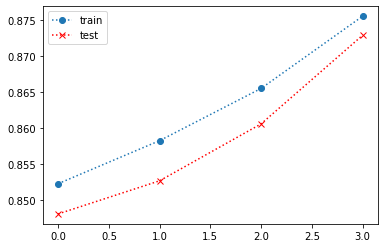

In [120]:
d={"train":train_acc2,
  "test":test_acc2}
acc_df=pd.DataFrame(d)
acc_df.plot(style=['o','rx'], linestyle = 'dotted')
plt.show()

## Analysis

For lower values of window size, there was no change in accuracy until a window size of 5 which increased the accuracy from 85 to 86, and then a window size of 10 which increased accuracy from 86 to 87.

# Question 4

## Part 1

An RNN is useful in this case because the architecture allows it to capture long-distance dependencies in the data better than a model like logistic regression which gives it something akin to memory. In other words, in a sentence like "the boy loves the dog," dog and boy are related through the word 'love.' An RNN allows the model to capture this dependency because the output of the network at any given point in time is not only dependent on the input at the present time step, but also on the state of the network from the previous time step, so as the network moves past the words 'boy' and 'loves' to the word 'dog', the state of the network at the words boy and loves are preserved and affect the output at the word dog.

## Part 2

In [10]:
#import packages
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras import layers
import tensorflow as tf
from keras.utils import pad_sequences

In [11]:
#set parameters
max_words = 1000
max_len = 150
#tokenize text
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
#convert to sequence
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [75]:
#define simple architecture
model = Sequential()
model.add(Embedding(max_words, 50, input_length=max_len))
model.add(LSTM(300))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [12]:
from sklearn.preprocessing import LabelEncoder

In [26]:
#label encode y variable
le=LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_train = Y_train.reshape(-1,1)

/Users/jakebrophy/miniforge3/envs/myenv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
history=model.fit(sequences_matrix,Y_train,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 93s 740ms/step - loss: 0.6618 - accuracy: 0.5902 - val_loss: 0.5526 - val_accuracy: 0.7495
Epoch 2/10
125/125 [==============================] - 91s 730ms/step - loss: 0.3833 - accuracy: 0.8336 - val_loss: 0.4172 - val_accuracy: 0.8179
Epoch 3/10
125/125 [==============================] - 90s 721ms/step - loss: 0.3327 - accuracy: 0.8603 - val_loss: 0.3480 - val_accuracy: 0.8530
Epoch 4/10
125/125 [==============================] - 93s 743ms/step - loss: 0.3209 - accuracy: 0.8635 - val_loss: 0.3488 - val_accuracy: 0.8443
Epoch 5/10
125/125 [==============================] - 95s 758ms/step - loss: 0.3187 - accuracy: 0.8661 - val_loss: 0.3435 - val_accuracy: 0.8512
Epoch 6/10
125/125 [==============================] - 89s 715ms/step - loss: 0.3042 - accuracy: 0.8713 - val_loss: 0.3572 - val_accuracy: 0.8451
Epoch 7/10
125/125 [==============================] - 90s 722ms/step - loss: 0.3005 - accuracy: 0.8729 - val_loss: 0.3403 - val_ac

In [85]:
sequences_test = tok.texts_to_sequences(X_test)
sequences_matrix_test = pad_sequences(sequences_test,maxlen=max_len)
y_pred = (model.predict(sequences_matrix_test) >= 0.5).astype("int")
import sklearn
Y_test_encode = le.fit_transform(Y_test)
Y_test_encode = Y_test_encode.reshape(-1,1)
sklearn.metrics.accuracy_score(Y_test_encode, y_pred)

313/313 [==============================] - 21s 66ms/step


0.8574

## Analysis:

The performance of the neural network is comparable to the logistic regression model output, which is surprising given the more advanced nature of the neural network model. I think there are two potential reasons for the similarity in performance: the first is that 10 epochs seems like too many and we are likely overfitting. This is evidenced by the fact that for the last few epochs our validation accuracy consistently does worse than in the first few epochs and early stopping should be used. The second is that the word2vec embeddings are likely much better for classification tasks which is why logit did so well.

# Question 5

In [47]:
#read in google vectors
from gensim.models import KeyedVectors
embeddings_index=KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

2023-03-09 14:15:13,737 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin.gz
2023-03-09 14:15:40,250 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from GoogleNews-vectors-negative300.bin.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2023-03-09T14:15:40.246978', 'gensim': '4.2.0', 'python': '3.8.11 (default, Aug 16 2021, 12:04:33) \n[Clang 12.0.0 ]', 'platform': 'macOS-13.2.1-arm64-arm-64bit', 'event': 'load_word2vec_format'}


In [19]:
#import Constant package
from keras.initializers import Constant
#set vocab size
vocab_size = len(tok.word_index) + 1
#set embedding dim and maximum words
EMBEDDING_DIM = 300
MAX_NUM_WORDS = 10000
#set word index
word_index = tok.word_index
num_words = vocab_size
#create empty embedding matrix
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
#loop through words present in our corpus
for word, i in word_index.items():
    #append words present in the google vectors to our embeddings index
    try:
        embedding_vector = embeddings_index[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

In [78]:
#define simple model architecture
model_w2v = Sequential()
model_w2v.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], input_length=max_len, trainable=False))
model_w2v.add(LSTM(300))
model_w2v.add(Dense(1, activation = 'sigmoid'))
model_w2v.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [79]:
history=model_w2v.fit(sequences_matrix,Y_train,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 116s 922ms/step - loss: 0.6264 - accuracy: 0.6511 - val_loss: 0.6146 - val_accuracy: 0.6624
Epoch 2/10
125/125 [==============================] - 115s 917ms/step - loss: 0.5005 - accuracy: 0.7555 - val_loss: 0.4716 - val_accuracy: 0.7819
Epoch 3/10
125/125 [==============================] - 115s 922ms/step - loss: 0.4347 - accuracy: 0.7997 - val_loss: 0.5141 - val_accuracy: 0.7857
Epoch 4/10
125/125 [==============================] - 113s 908ms/step - loss: 0.4216 - accuracy: 0.8105 - val_loss: 0.4322 - val_accuracy: 0.8006
Epoch 5/10
125/125 [==============================] - 116s 932ms/step - loss: 0.3905 - accuracy: 0.8259 - val_loss: 0.4244 - val_accuracy: 0.8065
Epoch 6/10
125/125 [==============================] - 110s 885ms/step - loss: 0.3729 - accuracy: 0.8355 - val_loss: 0.4173 - val_accuracy: 0.8014
Epoch 7/10
125/125 [==============================] - 113s 906ms/step - loss: 0.3603 - accuracy: 0.8403 - val_loss: 0.3733 -

In [86]:
y_pred = (model_w2v.predict(sequences_matrix_test) >= 0.5).astype("int")
sklearn.metrics.accuracy_score(Y_test_encode, y_pred)

313/313 [==============================] - 32s 101ms/step


0.8514

## Analysis:

Surprisingly, the neural network with google word2vec embeddings actually performed worse than the previous model, when I would have expected it to perform better. The likely reason for this is that we are undertraining the model, and 10 epochs is likely not enough. This is evidenced by the fact that we see the validation accuracy consistently going up with each additional epoch and does not plateau/decrease as in the previous network. Therefore, it would likely make sense to train the network for additional epochs

# Question 6

In [20]:
w1 = ["interest"]
w2v_model.wv.most_similar (positive=w1,topn=20)

[('intrigu', 0.748183012008667),
 ('engag', 0.694418728351593),
 ('unusu', 0.678403377532959),
 ('import', 0.6678760051727295),
 ('compel', 0.6577246189117432),
 ('worthwhil', 0.6548833847045898),
 ('entic', 0.6540057063102722),
 ('fascin', 0.651665210723877),
 ('enjoy', 0.647544801235199),
 ('entertain', 0.6293315291404724),
 ('excit', 0.6251449584960938),
 ('kernel', 0.6212165355682373),
 ('substant', 0.6188052296638489),
 ('workabl', 0.6180407404899597),
 ('satisfactori', 0.6140120029449463),
 ('occident', 0.6117244958877563),
 ('inconclus', 0.6108110547065735),
 ('develop', 0.5988857746124268),
 ('engross', 0.5982039570808411),
 ('layman', 0.5964980125427246)]

In [23]:
w1 = ["interesting"]
embeddings_index.most_similar(w1, topn=20)

[('intriguing', 0.8185973167419434),
 ('fascinating', 0.7623068690299988),
 ('exciting', 0.666785717010498),
 ('Interesting', 0.6602181196212769),
 ('intersting', 0.6464772820472717),
 ('instructive', 0.6250472068786621),
 ('intruiging', 0.6132698059082031),
 ('amusing', 0.5975308418273926),
 ('enlightening', 0.586188554763794),
 ('curious', 0.5820387005805969),
 ('surprising', 0.5713135004043579),
 ('interesing', 0.5630740523338318),
 ('noteworthy', 0.5548619031906128),
 ('perplexing', 0.5477174520492554),
 ('intresting', 0.544119119644165),
 ('entertaining', 0.5434436798095703),
 ('facinating', 0.5416558980941772),
 ('enjoyable', 0.5395940542221069),
 ('amazing', 0.5381636023521423),
 ('weird', 0.5364336967468262)]

## Analysis:

There does appear to be fairly significant differences in the most similar words to interesting betweent the two models, which makes sense because the google word2vec embeddings were trained on google searches, whereas our embeddings were trained on our data. Additionally, the imdb data was stemmed, so we had to use the word "interest" instead of "interesting."

In [123]:
#import PCA
from sklearn.decomposition import PCA

In [124]:
#get similar words for boring and interesting
int_words_similar_list=[i for i in list(zip(*embeddings_index.most_similar(w1, topn=20)))[0]]
boring_words_similar_list=[i for i in list(zip(*embeddings_index.most_similar('boring', topn=20)))[0]]

In [125]:
#combine lists
full_list=int_words_similar_list+boring_words_similar_list

In [126]:
#get word vectors
word_vectors = np.array([embeddings_index[w] for w in full_list])
pca=PCA()
pca_words = pca.fit(word_vectors)

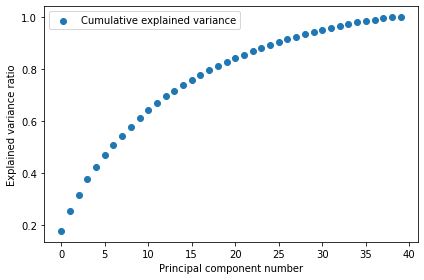

In [127]:
exp_var_pca = pca_words.explained_variance_ratio_

# Cumulative sum of eigenvalues to visualize factor loadings

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot

plt.scatter(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues,label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component number')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Analysis:

We will use 20 components because this explains close to 75% of the variance in our data

In [128]:
# Fit PCA
pca = PCA(n_components=20)
pca_w2v = pca.fit_transform(word_vectors)

In [129]:
#Create pandas df for plotting
pca_df = pd.DataFrame(data = pca_w2v[:,0:2], 
                                  columns = ['principal component 1', 'principal component 2'])

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

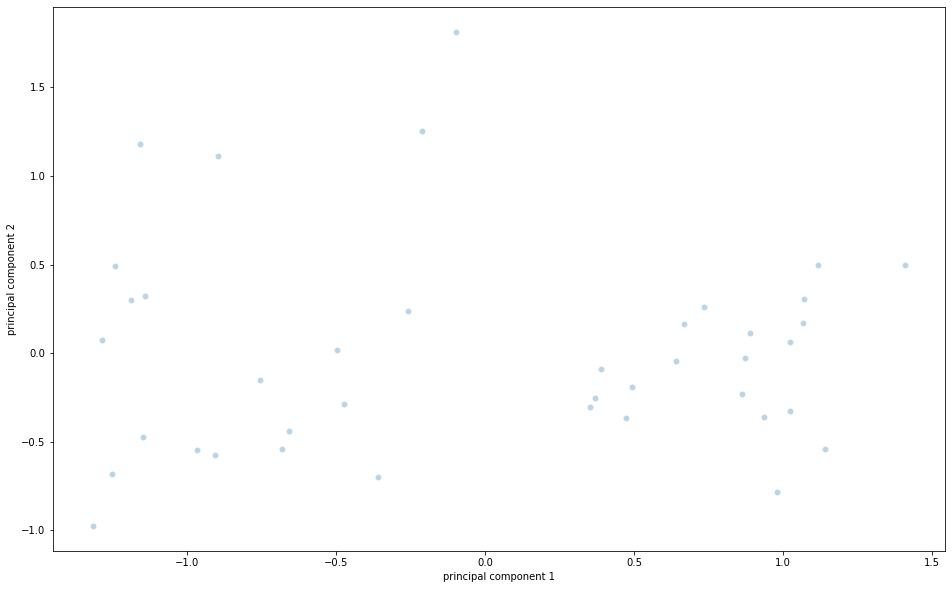

In [130]:
#Plot PC1 vs PC2
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    palette=sns.color_palette("hls", 10),
    data=pca_df,
    legend="full",
    alpha=0.3
)

## Analysis:

We see here that there are two clearly defined groups, one with PC1 above 0 and with PC1 below, which likely represents the two clusters around the words 'interesting' and 'boring.' There is very little overlap because the two are antonyms and likely do not have much similarity in their word vectors.